In [1]:
import math
import numpy as np
from scipy.optimize import basinhopping
from scipy.interpolate import interp1d

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

#f = lambda x: (x-1.65)**2
#f = lambda x: x.dot(x) + np.sin(np.linalg.norm(x) * np.pi)
f = lambda x: np.exp(x**2-1) + np.sin(x/2-0.5)

In [3]:
class RandomDisplacementBounds():
    """random displacement with bounds"""
    def __init__(self, stepsize=0.5):
        self.stepsize = stepsize

    def __call__(self, x):
        """take a random step but ensure the new position is within the bounds"""
        return np.clip(x + np.random.uniform(-self.stepsize, self.stepsize, np.shape(x)), 0., 1.)

def my_take_step(x):
    return np.clip(x + np.random.uniform(-0.5, 0.5, np.shape(x)), 0., 1.)

In [4]:
# the starting point
x0 = [0.5]


# rewrite the bounds in the way required by L-BFGS-B
bounds = [(0., 1.)]

minimizer_kwargs = dict(method="L-BFGS-B", bounds=bounds)

In [48]:
# use method L-BFGS-B because the problem is smooth and bounded
res = basinhopping(f, 0.5, minimizer_kwargs=minimizer_kwargs)
print(res)

                        fun: -0.11154609743276067
 lowest_optimization_result:       fun: -0.11154609743276067
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.43879129])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 4
      nit: 1
     njev: 2
   status: 0
  success: True
        x: array([0.])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 298
                        nit: 100
                       njev: 149
                    success: True
                          x: array([0.])


In [49]:
# define the new step taking routine and pass it to basinhopping
take_step = RandomDisplacementBounds()
result = basinhopping(f, 0.5, niter=100, minimizer_kwargs=minimizer_kwargs,
                      take_step=take_step)
print(result)

                        fun: -0.11154609743276067
 lowest_optimization_result:       fun: -0.11154609743276067
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.43879129])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 4
      nit: 1
     njev: 2
   status: 0
  success: True
        x: array([0.])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 310
                        nit: 100
                       njev: 155
                    success: True
                          x: array([0.])


In [34]:
# define the new step taking routine and pass it to basinhopping
result = basinhopping(f, x0, niter=100, minimizer_kwargs=minimizer_kwargs,
                      take_step=my_take_step)
print(result)

                        fun: 0.0
 lowest_optimization_result:       fun: 0.0
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([3.14159266])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 4
      nit: 1
     njev: 2
   status: 0
  success: True
        x: array([0.])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 298
                        nit: 100
                       njev: 149
                    success: True
                          x: array([0.])


In [54]:
(13 // 4 + 1)  

4

In [59]:
x = np.arange(0,1.1, 0.1)
u = np.array([0, 0.1, 0.15, 0.2, 0.3, 0.45, 0.635, 0.8, 1., 1.5, 5])

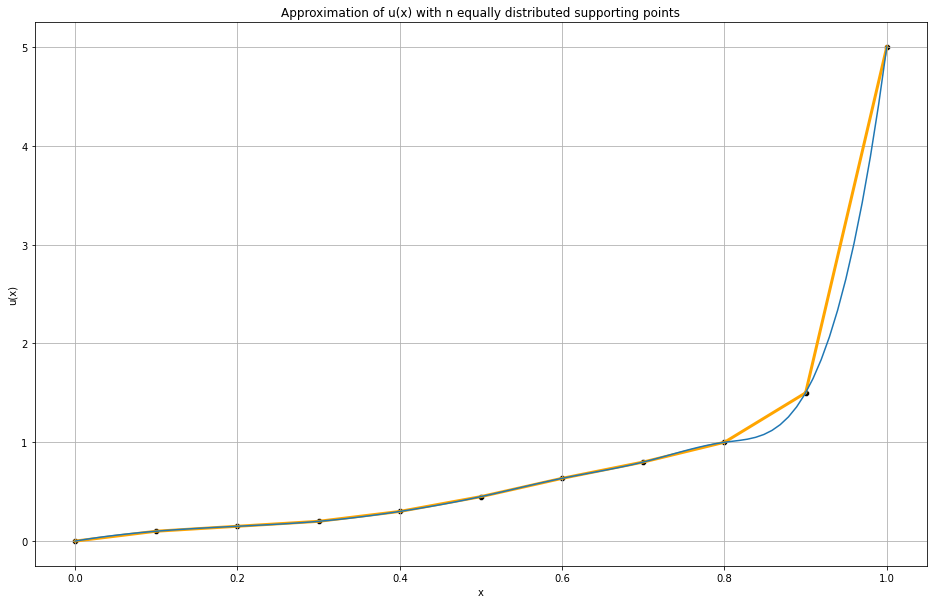

In [93]:
plt.figure(figsize=(16,10))
sns.scatterplot(x=x, y=u, color='black')
sns.lineplot(x=x, y=u, linewidth=3, color='orange')
f = interp1d(x, u, kind='cubic')

xnew = np.linspace(0., 1., 100)
ynew = f(xnew)   # use interpolation function returned by `interp1d`
plt.plot(xnew, ynew, '-')

plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Approximation of u(x) with n equally distributed supporting points')
plt.grid()
plt.show()

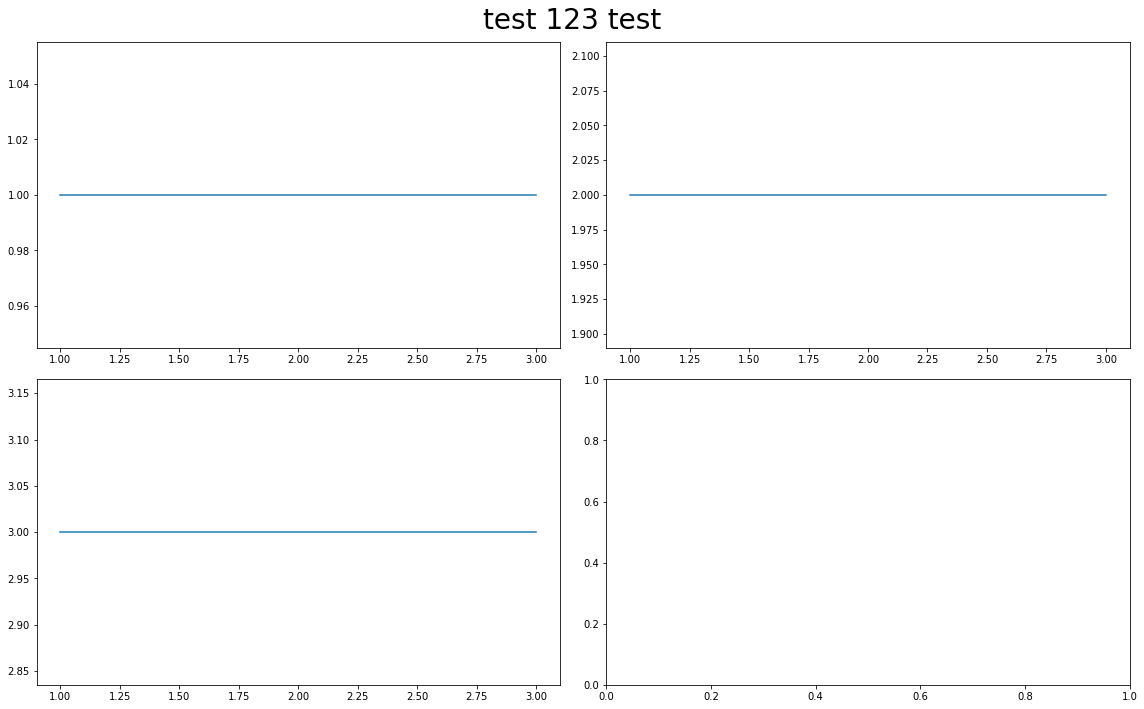

In [9]:
solutions = np.array([[1, 2, 3], [1, 2, 3], [1, 2, 3]])
x = [1,2,3]

fig, axes = plt.subplots(2, 2, figsize=(16,10), tight_layout=True)
for u, ax in zip(solutions.T, axes.flatten()):
    ax.plot(x, u, '-')
    
fig.suptitle('test 123 test', fontsize=28)
plt.show()

In [3]:
from solve import ReactionDiffusionEquation

In [4]:
f = lambda x: np.exp(x-1)
rde = ReactionDiffusionEquation(f=f, c=4)

In [5]:
rde.solve(verbose=True, optimized_grid=True)

Optimized supporting points require n-1 to be divisible by 4, n adjusted to 5
Solving the system of linear equations given by the following augmented matrix:
1.0  	0.0  	0.0  	0.0  	0.0  	|	0.0               
-16.0	36.0 	-16.0	0.0  	0.0  	|	0.4723665527410147
0.0  	-16.0	36.0 	-16.0	0.0  	|	0.6065306597126334
0.0  	0.0  	-16.0	36.0 	-16.0	|	0.7788007830714049
0.0  	0.0  	0.0  	0.0  	1.0  	|	0.0               


(array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
 array([0.        , 0.03684793, 0.05338492, 0.04535999, 0.        ]))

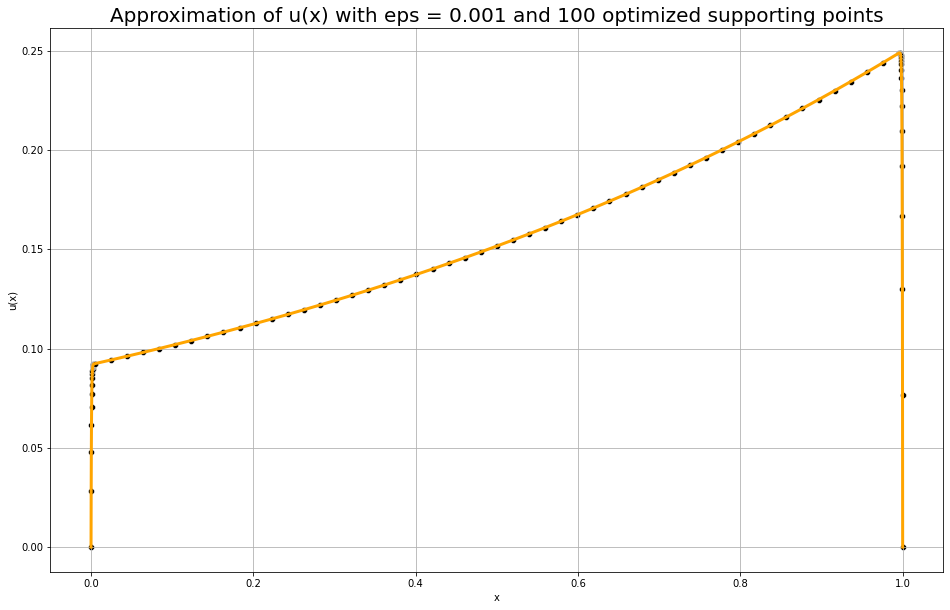

(array([0.00000000e+00, 1.84206807e-04, 3.68413615e-04, 5.52620422e-04,
        7.36827230e-04, 9.21034037e-04, 1.10524084e-03, 1.28944765e-03,
        1.47365446e-03, 1.65786127e-03, 1.84206807e-03, 2.02627488e-03,
        2.21048169e-03, 2.39468850e-03, 2.57889530e-03, 2.76310211e-03,
        2.94730892e-03, 3.13151573e-03, 3.31572253e-03, 3.49992934e-03,
        3.68413615e-03, 3.86834296e-03, 4.05254976e-03, 4.23675657e-03,
        4.42096338e-03, 4.60517019e-03, 2.44209634e-02, 4.42367566e-02,
        6.40525498e-02, 8.38683430e-02, 1.03684136e-01, 1.23499929e-01,
        1.43315723e-01, 1.63131516e-01, 1.82947309e-01, 2.02763102e-01,
        2.22578895e-01, 2.42394688e-01, 2.62210482e-01, 2.82026275e-01,
        3.01842068e-01, 3.21657861e-01, 3.41473654e-01, 3.61289448e-01,
        3.81105241e-01, 4.00921034e-01, 4.20736827e-01, 4.40552620e-01,
        4.60368414e-01, 4.80184207e-01, 5.00000000e-01, 5.19815793e-01,
        5.39631586e-01, 5.59447380e-01, 5.79263173e-01, 5.990789

In [7]:
rde.plot_solve(eps=0.001, n=100, interpolation='linear', optimized_grid=True)

In [6]:
n = [3, 10, 100]
solutions = rde.solve_multiple_n(n=[3, 10, 100], eps=0.1)

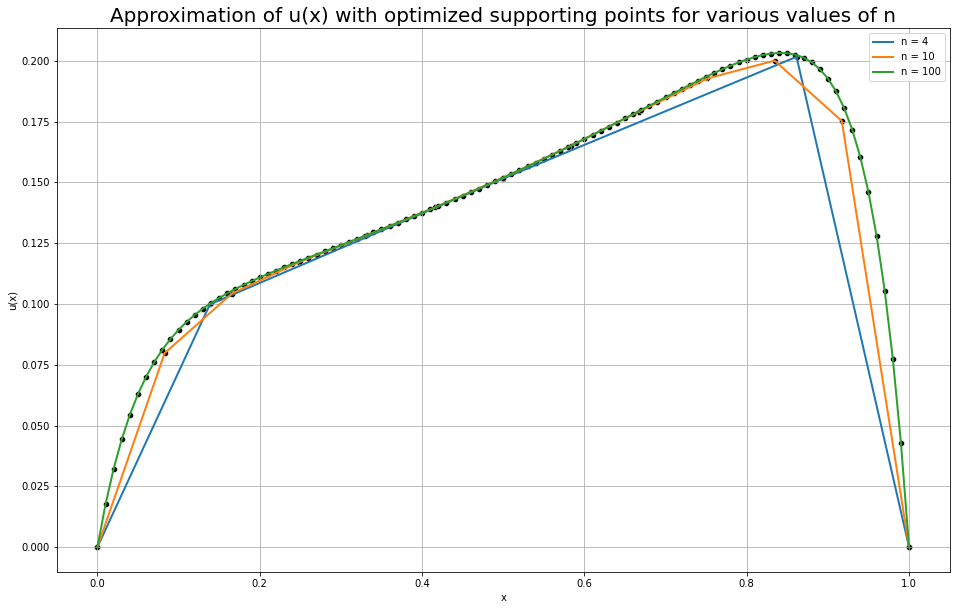

In [8]:
n = [4, 10, 100]
solutions = rde.plot_solve_multiple_n(n=n, eps=0.1, interpolation='linear', optimized_grid=True, subplots=False, scatter=True)

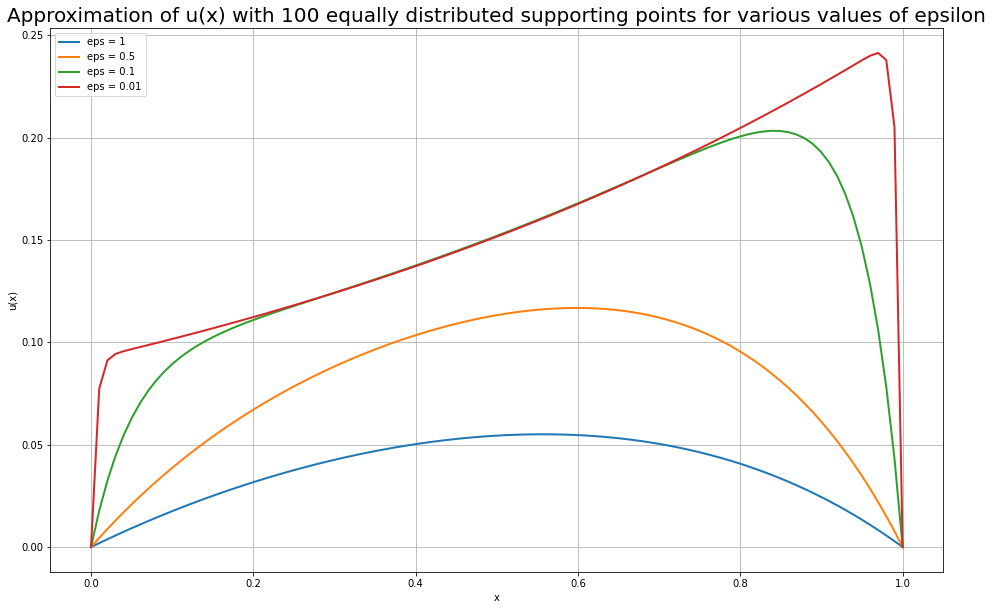

In [10]:
eps = [1, 0.5, 0.1, 0.01]
solutions = rde.plot_solve_multiple_eps(eps=eps, n=100, interpolation='cubic', subplots=False, scatter=False)

In [9]:
# Grenzschicht
# Genauigkeit --> nur für exakt lösbare interessant?
# Wahl der Test Cases
# Code auf Englisch?
# Ausarbeitung
# Vortrag

In [ ]:
# TODO implement optimized method
# TODO benchmark against to SymPy
# TODO enable plotting optimized grid and normal in one plot
# TODO README, comments